In [3]:
import pandas as pd

In [4]:
dataset=pd.read_csv("Preplacementdata.csv")

In [5]:
dataset

sl_no  ssc_p  hsc_p  degree_p  etest_p  mba_p    salary gender    ssc_b  \
0        1  67.00  91.00     58.00     55.0  58.80  270000.0      M   Others   
1        2  79.33  78.33     77.48     86.5  66.28  200000.0      M  Central   
2        3  65.00  68.00     64.00     75.0  57.80  250000.0      M  Central   
3        4  56.00  52.00     52.00     66.0  59.43       0.0      M  Central   
4        5  85.80  73.60     73.30     96.8  55.50  425000.0      M  Central   
..     ...    ...    ...       ...      ...    ...       ...    ...      ...   
210    211  80.60  82.00     77.60     91.0  74.49  400000.0      M   Others   
211    212  58.00  60.00     72.00     74.0  53.62  275000.0      M   Others   
212    213  67.00  67.00     73.00     59.0  69.72  295000.0      M   Others   
213    214  74.00  66.00     58.00     70.0  60.23  204000.0      F   Others   
214    215  62.00  58.00     53.00     89.0  60.22       0.0      M  Central   

       hsc_b     hsc_s   degree_t workex specialisation      status  
0     Others  Commerce   Sci&Tech     No         Mkt&HR      Placed  
1     Others   Science   Sci&Tech    Yes        Mkt&Fin      Placed  
2    Central      Arts  Comm&Mgmt     No        Mkt&Fin      Placed  
3    Central   Science   Sci&Tech     No         Mkt&HR  Not Placed  
4    Central  Commerce  Comm&Mgmt     No        Mkt&Fin      Placed  
..       ...       ...        ...    ...            ...         ...  
210   Others  Commerce  Comm&Mgmt     No        Mkt&Fin      Placed  
211   Others   Science   Sci&Tech     No        Mkt&Fin      Placed  
212   Others  Commerce  Comm&Mgmt    Yes        Mkt&Fin      Placed  
213   Others  Commerce  Comm&Mgmt     No         Mkt&HR      Placed  
214   Others   Science  Comm&Mgmt     No         Mkt&HR  Not Placed  

[215 rows x 15 columns]

In [4]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

# Covariance

In [5]:
dataset.cov()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12168\1846944379.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.cov()


sl_no          ssc_p          hsc_p       degree_p  \
sl_no      3870.000000     -52.641355     -58.106028     -40.413645   
ssc_p       -52.641355     117.228377      60.348373      42.897137   
hsc_p       -58.106028      60.348373     118.755706      34.819820   
degree_p    -40.413645      42.897137      34.819820      54.151103   
etest_p      52.556168      37.659225      35.461678      21.929469   
mba_p         8.102336      24.535952      22.555846      17.272020   
salary    24490.654206  901754.893936  763359.777657  465131.504238   

                etest_p          mba_p        salary  
sl_no         52.556168       8.102336  2.449065e+04  
ssc_p         37.659225      24.535952  9.017549e+05  
hsc_p         35.461678      22.555846  7.633598e+05  
degree_p      21.929469      17.272020  4.651315e+05  
etest_p      176.251018      16.886973  3.842344e+05  
mba_p         16.886973      34.028376  1.262455e+05  
salary    384234.419257  126245.485547  2.395714e+10

In [ ]:
#Diff between Degree pass mark and Etest and diff bet etest and mba
#Degree and Etest cov is 21.93 (Positive Covariance)
#Etest and MBA cov is 16.89 (Positive Covariance)

# Correlation

In [6]:
dataset.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12168\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


sl_no     ssc_p     hsc_p  degree_p   etest_p     mba_p    salary
sl_no     1.000000 -0.078155 -0.085711 -0.088281  0.063636  0.022327  0.002543
ssc_p    -0.078155  1.000000  0.511472  0.538404  0.261993  0.388478  0.538090
hsc_p    -0.085711  0.511472  1.000000  0.434206  0.245113  0.354823  0.452569
degree_p -0.088281  0.538404  0.434206  1.000000  0.224470  0.402364  0.408371
etest_p   0.063636  0.261993  0.245113  0.224470  1.000000  0.218055  0.186988
mba_p     0.022327  0.388478  0.354823  0.402364  0.218055  1.000000  0.139823
salary    0.002543  0.538090  0.452569  0.408371  0.186988  0.139823  1.000000

In [ ]:
#Diff between Degree pass mark and Etest and diff bet etest and mba
#MBA and salary correlation is 0.14 (Positive correlation)
#Positive means directly proportional.If mba value increases salary will increase in 14%

# Assignment on VIF

In [1]:
import seaborn as sns

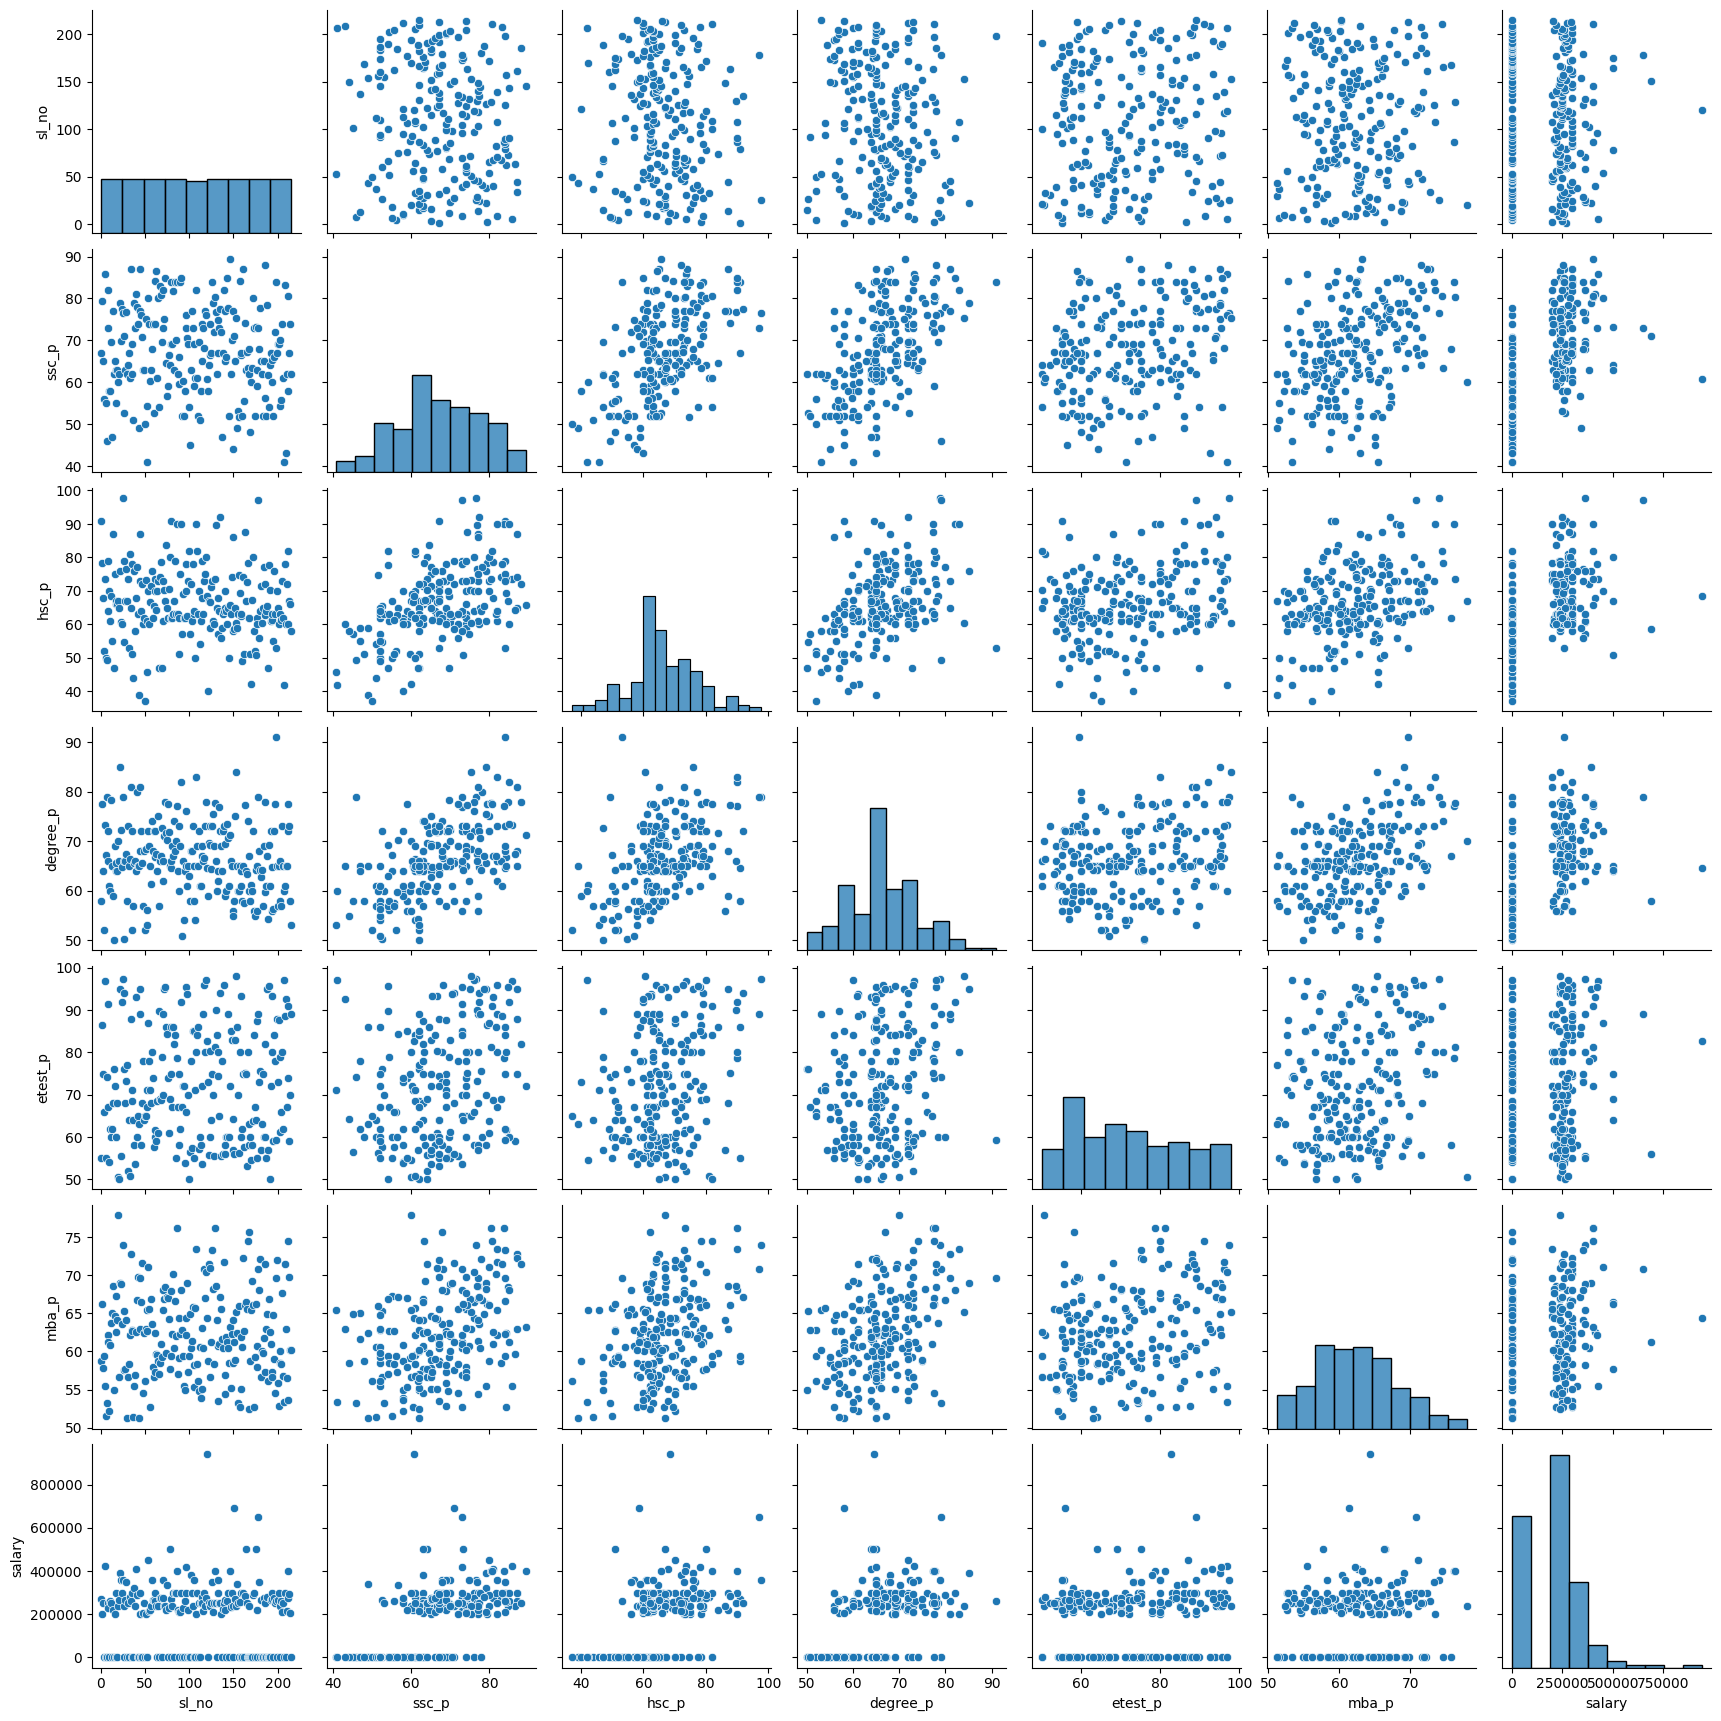

In [6]:
sns.pairplot(dataset)

In [ ]:
# In below code tried the normal for loop as an assignment whereas the same code is converted to a function below.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = dataset[["etest_p", "mba_p"]]
vif["variables"] = X.columns
vif = []
for i in range(X.shape[1]):
    y=variance_inflation_factor(X.values, i)
    vif.append(y)


In [17]:
vif

[29.56268437603734, 29.56268437603734]

In [18]:
#Converting above code to a function
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [19]:
calc_vif(dataset[["etest_p","salary"]])

variables       VIF
0   etest_p  2.745261
1    salary  2.745261

# Independant Sample- Unpaired T Test


# Diferrent Group(Male, Female) but same contion(salary)

In [20]:
dataset[dataset['gender']=='F']["salary"]

6           0.0
12          0.0
13     218000.0
15     200000.0
17          0.0
         ...   
197    260000.0
198         0.0
204    210000.0
208         0.0
213    204000.0
Name: salary, Length: 76, dtype: float64

In [21]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
male = dataset[dataset['gender']=='M']['salary']
female = dataset[dataset['gender']=='F']['salary']
#print(male)
ttest_ind(male, female)

TtestResult(statistic=2.1103433958668765, pvalue=0.03599560646745178, df=213.0)

# Dependant Sample-Paired T_Test¶
# Same Group(Male) but Different Condition(ssc_p,hsc_p)

In [22]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male = dataset[dataset['gender']=='M']['ssc_p']
male1 = dataset[dataset['gender']=='M']['hsc_p']
ttest_rel(male, male1)


TtestResult(statistic=0.6852881050898076, pvalue=0.49431164600731514, df=138)

# Assignment on Ttest

In [24]:
#Assignment
#Commerce and science student - MBA pass mark
#Different group same condition
#Independednt Sample - Unpaired Ttest
#from scipy.stats import ttest_ind

dataset=dataset.dropna()
commerce = dataset[dataset['hsc_s']=='Commerce']['mba_p']
science = dataset[dataset['hsc_s']=='Science']['mba_p']
#print(male)
ttest_ind(commerce, science)

TtestResult(statistic=-0.7331285580404581, pvalue=0.46432995253854314, df=202.0)

In [ ]:
#if pvalue is < 0.05 we reject Null hypothesis
#if pvalue is > 0.05 we accept Null hypothesis
#Here pvalue - 0.46 which is > than 0.05 ---> we are accepting Null hypothesis
#hence there is no significant difference between commerce and science students in MBA mark

In [26]:
#Assignment
#Group - Commerce with mba_p and etest
#Same group different condition
#Dependednt Sample - Paired Ttest

In [27]:
commerce = dataset[dataset['hsc_s']=='Commerce']['mba_p']
commerce1 = dataset[dataset['hsc_s']=='Commerce']['etest_p']
ttest_rel(commerce, commerce1)

TtestResult(statistic=-7.868552092606871, pvalue=2.462926468454984e-12, df=112)

In [29]:
#if pvalue is < 0.05 we reject Null hypothesis
#if pvalue is > 0.05 we accept Null hypothesis
#Here pvalue - 2.46e-12 which is < than 0.05 ---> we are rejecting Null hypothesis ----->accepting Alternate Hypothesis
#hence there is significant difference between MBA mark and Entrance test mark of students in commerce group

# Hypothesis Testing

In [30]:
#Statement: Test whether SSC_p of male and HSC_P of Male is Same?
#Null hypothesis=There is no similarity between 10th pass mark of male  and 12th pass mark of male

In [31]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male = dataset[dataset['gender']=='M']['ssc_p']
male1 = dataset[dataset['gender']=='M']['hsc_p']
ttest_rel(male, male1)


TtestResult(statistic=0.6852881050898076, pvalue=0.49431164600731514, df=138)

In [32]:
#Conclusion

#if pvalue is < 0.05 we reject Null hypothesis
#if pvalue is > 0.05 we accept Null hypothesis
#Here pvalue - 0.49 which is > than 0.05 ---> we are accepting Null hypothesis
#hence there is no significant difference between SSC and HSC marks of Male students 

# Reject Null hypothesis p<0.05
# Accept Null Hypothesi and Reject Alternate hypothsis
# ANAVO : Analysis of Variance

In [33]:
import scipy.stats as stats

stats.f_oneway(dataset['ssc_p'],dataset['hsc_p'],dataset['degree_p'])

F_onewayResult(statistic=0.6719700864663097, pvalue=0.5110602818995302)

In [34]:
#Conclusion

#if pvalue is < 0.05 we reject Null hypothesis
#if pvalue is > 0.05 we accept Null hypothesis
#Here pvalue - 0.51 which is > than 0.05 ---> we are accepting Null hypothesis
#hence there is no significant difference between SSC, HSC and Degree marks of students 

# Assignment - Two way

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Two-way ANOVA using statsmodels
model = ols('mba_p ~ C(gender) + C(hsc_s) + C(gender):C(hsc_s)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                         sum_sq     df          F    PR(>F)
C(gender)            667.569125    1.0  21.455116  0.000006
C(hsc_s)              28.116580    2.0   0.451822  0.637088
C(gender):C(hsc_s)    93.277552    2.0   1.498931  0.225760
Residual            6502.968683  209.0        NaN       NaN


In [ ]:
#Conclusion

#Pvalue gender 0.00 < 0.05------> so we reject the null hypothesis for gender.
#pvalue of hsc 0.63 > 0.05------>so we accept null hypothesis for hsc.
#their interaction between gender and hsc p value 0.22>0.05
#As p value of interaction >0.05  (p > 0.05), here we fail to reject the interaction null hypothesis, accepting null hypothesis here.
